**COMP3670 Assignment 4 - Regression**
---

**Enter Your Student ID:** u6726234

**Your Name:** Wyman Wong
    
**Deadline:** 23:59pm, September 29th, 2019

**Submit:** Write your answers in this file, and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'uXXXXXXX.ipynb'.
    
**Enter Discussion Partner IDs Below:**
- None
    
**Theory Section** (50%)
- A = 16.67%
- B = 16.67%
- C = 16.67%

**Programming Section** (50% + 20% BONUS MARKS)
- 1.1 = 2.69%
- 1.2 = 1.35%
- 1.3 = 2.69%
- 1.4 = 10.77%
- 1.5 = 6.73%
- 1.6 = 6.73%
- 1.7 = 4.03%
- 2.1 = 5%
- 2.2 = 5%
- 2.3 = 12.5%
- 2.4 = 2.5%
- 2.5 = 10%

**Version History:**
- Created 09/2019 (Michael Bennett)
- Theory Section 09/2019 (David Quarel)
- Added corrections to grade weightings and ex2 loss function description (Michael Bennett) 21/09/19
- (Michael Bennett) 23/09/19 Updated:
    - The gradient descriptions in Exercise 2 (specifically $\frac{d s}{d X\theta^{[1]}}$)
    - Clarified some descriptions in EX2 to be clearer.
    - Changed EX2.1 to np.array instead of np.matrix.


THEORY SECTION (50%)
---

Questions marked $\textbf{X.Y}$ are taken from 
the textbook $\textit{Mathematics for Machine Learning},
\href{https://mml-book.github.io/book/mml-book.pdf}
	{\texttt{https://mml-book.github.io/book/mml-book.pdf}}$.
    
Either write your answers in LaTex, or embed images of your answers for each respective answer after the headings below.

---

**THEORY EXERCISE A**

Recall from last assignment the K-means algorithm.
As a reminder, $D = \{\textbf{x}_1, \ldots \textbf{x}_N \}$ is the data set,
that we wish to classify into $K$ many clusters.

For each point $\textbf{x}_n$, we introduce the binary indicator 
$r_{nk} \in \{0,1\}$, which indicates to which cluster $\textbf{x}_n$ belongs.

$$
r_{nk} = \begin{cases}
1 & \textbf{x}_n \text{ is assigned to cluster }k \\
0 & \text{otherwise} \end{cases}	
$$

We introduce a collection of vectors $\{ {\mu}_1, \ldots {\mu}_K \}$,
where ${\mu}_k$ is a vector that represents cluster $k$.

The loss function (which measures the squared distance of 
how far each data point ${x}_n$ is away from the 
representative vector ${\mu}_k$ of its cluster) is given by

$$
L = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\textbf{x}_n - {\mu}_k||_2^2
$$
   
You were told in the last assignment that for a particular assignment $r_{nk}$, 
 choosing $${\mu}_k := \frac{\sum_{n} r_{nk} \textbf{x}_n}{\sum_n r_{nk}}$$
  minimises the loss function with respect to ${\mu}_k$.
  Prove it!
  
  ---

$\langle$ *Write Your Answer Here* $\rangle$

$$
\begin{align}
    L   &= \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\textbf{x}_n - {\mu}_k||_2^2 \\
        &= \sum_{n=1}^N \sum_{k=1}^K r_{nk} (\textbf{x}_n - {\mu}_k)^2 \\
        &= \sum_{n=1}^N \sum_{k=1}^K r_{nk} (\textbf{x}_n^2 - 2\textbf{x}_n {\mu}_k + {\mu}_k^2) 
\end{align}
$$

For $\forall i \in [1, K] $,
$$
\begin{align}
    L_i   &= \sum_{n=1}^N r_{ni} (\textbf{x}_n^2 - 2\textbf{x}_n {\mu}_i + {\mu}_i^2) 
\end{align}
$$

Then we have,
$$
\begin{align}
    \frac{\partial L_i}{\partial \mu_i} &= \sum_{n=1}^N r_{ni} (2{\mu}_i - 2\textbf{x}_n) 
\end{align}
$$

Let $ \frac{\partial L_i}{\partial \mu_i} = 0 $, then 
$$
\begin{align}
    \frac{\partial L_i}{\partial \mu_i} &= 0 \\
    2\sum_{n=1}^N r_{ni} {\mu}_i &= 2\sum_{n=1}^N r_{ni} \textbf{x}_n \\
    {\mu}_i &= \frac{\sum_{n=1}^N r_{ni} \textbf{x}_n}{\sum_{n=1}^N r_{ni}}
\end{align}
$$

And $ \frac{\partial^2 L_i}{\partial \mu_i^2} = 2\sum_{n=1}^N r_{ni} \gt 0 $ according to the definition of $ r_{nk} $, so $ L_i $ can get a minimal when $ {\mu}_i = \frac{\sum_{n=1}^N r_{ni} \textbf{x}_n}{\sum_{n=1}^N r_{ni}} $.

Thus, in general, choosing $ {\mu}_k = \frac{\sum_{n} r_{nk} \textbf{x}_n}{\sum_n r_{nk}} $ minimises the loss function with respect to ${\mu}_k$.

---

**THEORY EXERCISE B**

Let $\mathbf{A} \in \mathbb{R}^{N \times N}, {\Lambda} \in \mathbb{R}^{D \times D}$ be symmetric, positive definite.
Define $\langle \textbf{x}, \textbf{y} \rangle_\textbf{A} := \textbf{x}^T \textbf{A} \textbf{y}$. Define the corresponding norm in the usual fashion.
$$
||{\textbf{x}}||_\textbf{A} := \sqrt{\langle{x},{x}\rangle_\textbf{A}}
$$
We can define $\langle \cdot, \cdot \rangle_{ {\Lambda}}$ and $||{\cdot}||_{ {\Lambda}}$
in the same way.
Suppose we are performing linear regression, with a training set 
$\{(\textbf{x}_1, y_1), \ldots, (\textbf{x}_N, y_N)\}$, where for each $i$, 
$\textbf{x}_i \in \mathbb{R}^{D}$ and $y_i \in \mathbb{R}$. We can define the two matrices
$$
\textbf{X} = \left[ \textbf{x}_1, \ldots, \textbf{x}_N \right]^T \in \mathbb{R}^{N \times D}
$$
and 
$$
\textbf{y} = \left[ y_1, \ldots, y_N \right]^T \in \mathbb{R}^N.
$$
We would like to find $ {\theta} \in \mathbb{R}^{D}$, such that $\textbf{y} \approx \textbf{X}  {\theta}$,
where the error is measured using $||{\cdot}||_\textbf{A}$. We avoid overfitting
by using a weighted regularization term, measured using $||{\cdot}||_{ {\Lambda}}$.
We define the loss function with regularizer:
$$
\mathcal{L}_{\textbf{A},  {\Lambda}}( {\theta}) 
=  ||{\textbf{y} - \textbf{X}  {\theta}}||_\textbf{A}^2 + ||{ {\theta}}||_{ {\Lambda}}^2
$$


1. Find the gradient $\nabla_{ {\theta}} 
    \mathcal{L}_{\textbf{A},  {\Lambda}} ( {\theta})$.
2. Let $\nabla_{ {\theta}} \mathcal{L}_{\textbf{A},  {\Lambda}}( {\theta}) = \textbf{0}$, and solve
    for $ {\theta}$. 
3. Show that if we choose $\textbf{A} = \textbf{I}$, and $ {\Lambda} = \lambda \textbf{I}$, where $\lambda \in \mathbb{R}$, your answer for 2. agrees with the analytic solution for the standard least
    squares regression problem with regularization, given by
    $ {\theta} = (\textbf{X}^T \textbf{X} + \lambda \textbf{I})^{-1} \textbf{X}^T \textbf{y}$. 
4.  What advantages are there in choosing $||{ {\theta}}||^2_{ {\Lambda}}$ over
    the more standard regularization term $\lambda ||{ {\theta}}||_2^2$?


**HINT:** 
- You may use the property that a asymetric positive definite matrix is invertible.
- Since $\textbf{A}$ is symmetric and positive definite, that implies $\langle \cdot , \cdot \rangle_{\textbf{A}}$ is a valid inner product.

---

$\langle$ *Write Your Answer Here* $\rangle$

**1.**
From the information given, extend the loss function with regularizer:

$$
\begin{align}
    \mathcal{L}_{\textbf{A}, \Lambda}(\theta) 
    &= ||{\textbf{y}-\textbf{X}\theta}||_\textbf{A}^2 + ||\theta||_{\Lambda}^2 \\
    &= (\sqrt{\langle \textbf{y}-\textbf{X}\theta, \textbf{y}-\textbf{X}\theta \rangle_\textbf{A}})^2 + (\sqrt{\langle \theta, \theta \rangle_\Lambda})^2 
    &\quad (\text{ Definition of } || \cdot ||) \\
    &= (\textbf{y}-\textbf{X}\theta)^T \textbf{A} (\textbf{y}-\textbf{X}\theta) + \theta^T \Lambda \theta
    &\quad (\text{ Definition of } \langle \cdot, \cdot \rangle_\textbf{A} \text{ and } \langle \cdot, \cdot \rangle_\Lambda) 
\end{align}
$$ 
    
Let $ \ell(\theta) = \textbf{y}-\textbf{X}\theta $.

According to the identity $ \frac{\partial x^T B x}{\partial x} = x^T(B+B^T) $, 
using chain rule for $ \ell(\theta) $, We have 

$$
\begin{align}
    \nabla_{\theta} \mathcal{L}_{\textbf{A}, \Lambda}(\theta)
    &= \frac{\partial \mathcal{L}_{\textbf{A}, \Lambda}}{\partial \ell} (-\textbf{X})
    + \theta^T(\Lambda + \Lambda^T) \\
    &= \ell^T(\textbf{A} + \textbf{A}^T)(-\textbf{X}) + \theta^T(\Lambda + \Lambda^T) \\
    &= -(\textbf{y}-\textbf{X}\theta)^T(\textbf{A} + \textbf{A}^T) \textbf{X} + \theta^T(\Lambda + \Lambda^T)
\end{align}
$$


**2.**
$ \textbf{A} $ and $ \Lambda $ are both symmetric, positive definite matrices, so they are invertable.

Let $\nabla_{ {\theta}} \mathcal{L}_{\textbf{A},  {\Lambda}}( {\theta}) = \textbf{0}$

$$
\begin{align}
    \textbf{0}
        &= \theta^T(\Lambda + \Lambda^T)
           -(\textbf{y}-\textbf{X}\theta)^T(\textbf{A}+\textbf{A}^T) \textbf{X}  \\
    \theta^T(\Lambda + \Lambda^T) 
        &= (\textbf{y}-\textbf{X}\theta)^T(\textbf{A} + \textbf{A}^T) \textbf{X} \\
    (\Lambda^T+\Lambda)\theta 
        &= \textbf{X}^T(\textbf{A}^T+\textbf{A})(\textbf{y}-\textbf{X}\theta) 
        & \quad (\text{Transpose on both sides}) \\
    (\Lambda^T+\Lambda)\theta 
        &= \textbf{X}^T(\textbf{A}^T+\textbf{A})\textbf{y}
            -\textbf{X}^T(\textbf{A}^T+\textbf{A})\textbf{X}\theta 
        & \quad (\text{Distributivity of matrix multiplication}) \\
    [(\Lambda^T+\Lambda)+\textbf{X}^T(\textbf{A}^T+\textbf{A})\textbf{X}]\theta 
        &= \textbf{X}^T(\textbf{A}^T+\textbf{A})\textbf{y}\\
    \theta 
        &= [(\Lambda^T+\Lambda)+\textbf{X}^T(\textbf{A}^T+\textbf{A})\textbf{X}]^{-1}
            \textbf{X}^T(\textbf{A}^T+\textbf{A})\textbf{y}
        & (\text{Inverse of matrix})
\end{align}
$$

**3.**
We choose $\textbf{A} = \textbf{I}$, and $ {\Lambda} = \lambda \textbf{I}$, where $\lambda \in \mathbb{R}$

Then we have

$$
\begin{align}
    \theta 
        &= [(\Lambda^T+\Lambda)+\textbf{X}^T(\textbf{A}^T+\textbf{A})\textbf{X}]^{-1}
            \textbf{X}^T(\textbf{A}^T+\textbf{A})\textbf{y} \\
        &= (2\lambda \textbf{I}+\textbf{X}^T(2\textbf{I})\textbf{X})^{-1}
            \textbf{X}^T(2\textbf{I})\textbf{y} \\
        &= 2^{-1} \times 2(\lambda \textbf{I}+\textbf{X}^T\textbf{X})^{-1} \textbf{X}^T\textbf{y} \\
        &= (\textbf{X}^T\textbf{X}+\lambda \textbf{I})^{-1} \textbf{X}^T\textbf{y}
\end{align}
$$

which agrees with the analytic solution for the standard least squares regression problem with regularization.

**4.**

Choosing $ ||\theta||_\Lambda^2 $ over $ ||\lambda||_2^2 $ will multiply the matrices $ (\textbf{A}+\textbf{A}^T) $ and $ (\Lambda+\Lambda^T) $ in the loss function as well as its gradient. Instead of only multiplying with a scaler 2, the matrices can perform a feature mapping in the calculation to justify the sparsity. The regularizer will be applied within different weights for each element in $ \theta $ to avoid overfitting in an accelarating way.

---

**THEORY EXERCISE C**

During linear regression, the goal is to attempt to fit a model to data given.
Usually we have a family of models to choose from, and the particular model
selected is categorized by a parameter $\theta$. We wish to choose the $\theta$ that
gives us the "best" fit, where "best" is usually defined as the $\theta$ that
minimises some measure of error. How the error is measured can vastly change the behaviour
of the optimal model, along with how easy it is to find an optimal value.

Consider the following linear regression problem in one dimension. We have a collection 
$\mathcal{D} = \{x_1, \ldots, x_n\}$ of $N$ many points in $\mathbb{R}$, and we want
to choose the best representative $\mu \in \mathbb{R}$ for that dataset $\mathcal{D}$.
Assume that the points are listed in order,
$$
x_1 \leq x_2 \leq \ldots \leq x_n
$$

The best choice of $\mu$ is one that minimises some loss function $L(\mu,\mathcal{D})$.


1. For the $L_2$ loss function, $L_2(\mu,D) = \sum_{i=1}^N (\mu - x_i)^2$, show
    that the optimal choice for $\mu$ is the mean, $\mu = \frac{1}{N} \sum_{i=1}^N x_i$.
    
2. For the $L_1$ loss function, $L_1(\mu,D) = \sum_{i=1}^N |\mu - x_i|$, show that
    the optimal choice for $\mu$ is the median value in the set.\\
(Hint: Try pairing off opposite terms in $L_1$, and argue why they must be constant.)

3. For the $L_\infty$ loss function, $L_\infty(\mu,D) = \max_{1 \leq i \leq n} | \mu - x_i|$,
show that the optimal choice for $\mu$ is $\frac{x_1 + x_n}{2}$, the average of only the
largest and smallest data point in the set.\\
(Hint: Argue why the internal points $x_2 ,\ldots, x_{n-1}$ are irrelevant.) 

4. For the following data sets, compute the optimal representative $\mu$ with respect
to the $L_2, L_1$ and $L_\infty$ loss function. Draw your result in a table as shown
below. (You don't need to show the calculations for this.) Comment on how sensitive each loss function is
to outliers.

\begin{align*}
\mathcal{D}_1 &= \{0,1,2,3,5\} \\
\mathcal{D}_2 &= \{0,1,2,3,100\} \\
\mathcal{D}_3 &= \{0,10,30,35,100\}\\
\end{align*}


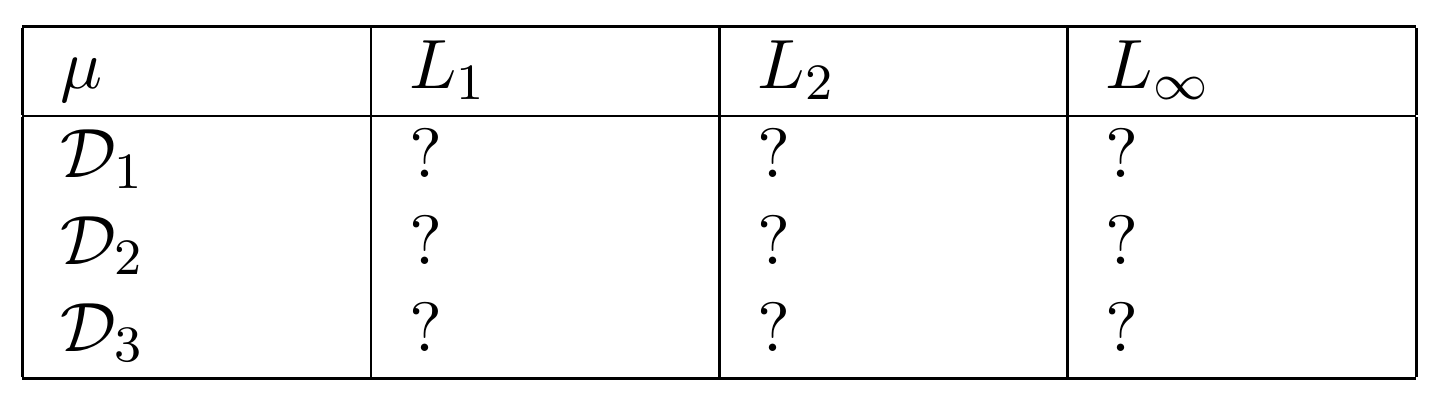


**HINT:** The middle value in the data set. For odd many points, it is just the middle point. For evenly many points, it is the average of the two middle values.

---

$\langle$ *Write Your Answer Here* $\rangle$

**1.**
$$
\begin{align}
    L_2(\mu, D) 
        &= \sum_{i=1}^N (\mu - x_i)^2 \\
        &= \sum_{i=1}^N (\mu^2 - 2\mu x_i + x_i^2) \\
        &= N\mu^2 - 2\mu \sum_{i=1}^N x_i + \sum_{i=1}^N x_i^2 \\
    \frac{\partial L_2}{\partial \mu} &= 2N\mu - 2\sum_{i=1}^N x_i
\end{align}
$$

Let $ \frac{\partial L_2}{\partial \mu} = 0 $, we have $ \mu = \frac{1}{N}\sum_{i=1}^N x_i $,
which means that the optimal choice for $ \mu $ is the mean.

**2.**
Since we know that $ x_1 \leq x_2 \leq \ldots \leq x_n $, 
assume $ x_k \leq \mu \leq x_{k+1} $, where $ k \in [1, N) $.

$$
\begin{align}
    L_1(\mu, D) 
        &= \sum_{i=1}^N |\mu - x_i| \\
        &= (\mu - x_1) + \ldots + (\mu - x_k) + (x_{k+1} - \mu) + \ldots + (x_N - \mu) \\
\end{align}   
$$

It is obvious that each item in $ \frac{\partial L_1}{\partial \mu} $ equals to 1 or -1.

To achieve $ \frac{\partial L_1}{\partial \mu} = 0 $, we counteract each two items respectively from the beginning and the end.

(1) If N is odd, we want 
$$
\begin{align}
    0   &= \frac{\partial L_1}{\partial \mu} \\
        &= \sum_{i=1}^N \frac{\partial}{\partial \mu} |\mu - x_i| \\
        &= \sum_{i=1}^{\frac{N-1}{2}} \frac{\partial}{\partial \mu} (|\mu - x_i| + |\mu - x_{N+1-i}|) 
            + \frac{\partial}{\partial \mu} |\mu - x_{\frac{N+1}{2}}|\\
        &= \sum_{i=1}^{k-1} 1 + \sum_{j=k}^N (-1) + 0 \\
\end{align}   
$$
to be valid if and only if $ \mu = x_k $ and $ k = \frac{N+1}{2} $,
which means $ \mu $ is the median value in the set D.

(2) If N is even, the quation becomes 
$$
\begin{align}
    0   &= \frac{\partial L_1}{\partial \mu} \\
        &= \sum_{i=1}^N \frac{\partial}{\partial \mu} |\mu - x_i| \\
        &= \sum_{i=1}^{\frac{N}{2}} \frac{\partial}{\partial \mu} (|\mu - x_i| + |\mu - x_{N+1-i}|) \\
        &= \sum_{i=1}^{k} 1 + \sum_{j=k+1}^N (-1) \\
\end{align}   
$$
and it is valid if and only if $ x_k < \mu < x_{k+1} $ and $ k = \frac{N}{2} $.

From the discussion above, the optimal choice for $ \mu $ is the median value in the set D.

**3.**
For $L_\infty(\mu,D) = \max_{1 \leq i \leq n} | \mu - x_i|$, 
bases on the given condition $ x_1 \leq x_2 \leq \ldots \leq x_n $, we discuss the following situations:

(1) If $ \mu > x_n$, then $ L_\infty(\mu,D) = \mu - x_1, \frac{\partial L_\infty}{\partial \mu} = 1 $.

(2) If $ \mu < x_1$, then $ L_\infty(\mu,D) = x_n - \mu, \frac{\partial L_\infty}{\partial \mu} = -1 $.

(3) If $ x_1 \leq \mu \leq x_n $, then 
$$
\begin{align}
    L_\infty(\mu,D) 
        &= \max_{1 \leq i \leq n} |\mu - x_i| \\
        &= max\lbrace \mu - x_i, x_n - \mu \rbrace & (\text{Condition of } x_1 \leq x_2 \leq \ldots \leq x_n) \\
        &= \begin{cases}
               \mu - x_1, & \text{if } \mu-x_1 > x_n-\mu. \\
               \frac{x_n-x_1}{2}, & \text{if } \mu-x_1 = x_n-\mu. \\
               x_n - \mu, & \text{if } \mu-x_1 < x_n-\mu. \\
           \end{cases}
\end{align} 
$$

From all the situation above, $ \frac{\partial L_\infty}{\partial \mu} = 0 $ if and only if $ \mu-x_1 = x_n-\mu \Rightarrow \mu = \frac{x_1+x_n}{2} $.

Consequently, the optimal choice for $ \mu $ is $ \frac{x_1+x_n}{2} $ , the average of only the largest and smallest data point in the set D.

**4.**

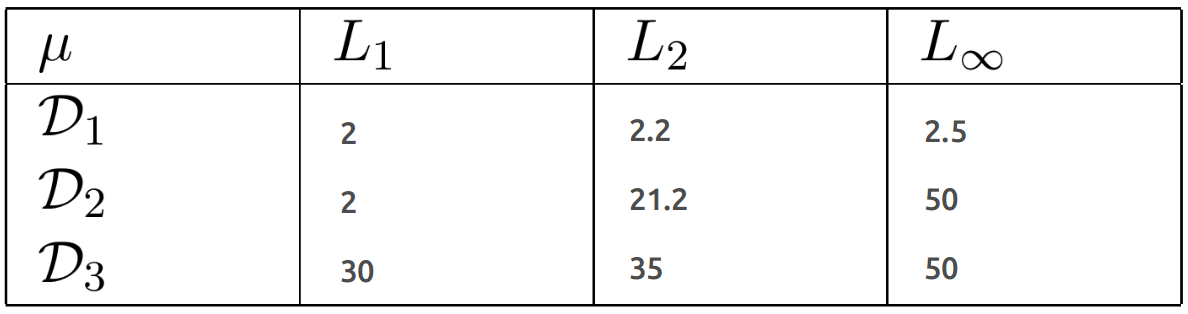

$ L_1 $ loss function is the least sensitive to outliers. With the index incresing, loss function become more and more sensitive to outliers and $ L_\infty $ shows the highest sentitivity because the outliers make more contribution to the result as the index increses.

---


**PROGRAMMING SECTION (50%)**
---

For all of the following, program the solution yourself. Don't just call a library function that does the whole question for you, or you'll get zero (no, that doesn't mean you can't use any library functions, but it does mean that you have to show you understand how to compute the answer yourself).

**All written answers** should be between 50 and 500 words. If you can describe all the necessary information in 50 words, that's better. However, you'll only be graded on whether you describe the necessary ideas.


-----------

   **TASK 0.1:** You know the drill. Import Numpy and PyPlot. We're also going to generate a dataset.


-----------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #This is for 3d scatter plots.
import math
import random
np.random.seed(13579201)

#This is the dataset we're using for EX1.
#It's a linear combination of 3 orthonormal vectors; 0hz, 1hz and 2hz.
#This is infact a square-wave transform in the same vein as a fourier transform!
zero_hz = np.array([[1],
                [1],
                [1],
                [1]])
one_hz = np.array([[0],
                [1],
                [0],
                [-1]])
two_hz = np.array([[1],
                [-1],
                [1],
                [-1]])

zero_hz = zero_hz / np.linalg.norm(zero_hz)
one_hz = one_hz / np.linalg.norm(one_hz)
two_hz = two_hz / np.linalg.norm(two_hz)
basis = np.hstack((zero_hz, one_hz, two_hz))

m = 5000
n = basis.shape[0] #DO NOT CHANGE
k = 3 #MAX 3, MIN 1. You can play around with this to check 
      #your code works for different k.
basis = basis[:, :k]
Y = np.zeros((m, k))
X = np.random.randn(m, n)
for ix in range(Y.shape[0]):
    for iy in range(k):
        Y[ix, iy] = X[ix, :] @ basis[:, iy] + np.array(np.random.randn(1)).T * 0.05
print('Done')

Done


PROGRAMMING EXERCISE 1  
-----------

This week we're focussing on linear regression.

Specifically for exercise 1, we're going to implement multiple target **batch** linear regression with mean squared loss $\mathcal{L} = \frac{1}{2 m} \sum_{i = 0}^{m} \mid \mid x_i\theta - y_i \mid \mid^2$.

We'll be working with a dataset which is a sum of orthonormal square-waves.

---
   **TASK 1.1:** In your own words, briefly explain what linear regression is. Why gradient descent is useful in comparison to the closed form solution employing the pseudo inverse.
   
Generally, what kind of functions cannot be modelled by linear regression?

---


$\langle$ *Write Your Answer Here* $\rangle$

Belonging to supervised learning, linear regression infers the underlying function as a line or curve from the given input data and output data. 

Gradient descent is cheaper in computation than the closed form solution employing the pseudo inverse in most cases, especially when the target variable is in large dimension.

The functions that contains non-linear items cannot be modelled by linear regression, such exponential functions, logarithm functions, etc.





---

For the following questions:
- $X \in \mathbb{R}^{m \times n}$ is the matrix of data we're learning from. Each row of $X$ is a single training example.
- $\theta$ is our parameters. In the linear regression you've seen thus far, this is a vector. However, as we're doing multiple target linear regression, $\theta$ will be a matrix.
- $Y \in \mathbb{R}^{m \times k}$ is a matrix of the target values we're trying to estimate for each row of $X$. Each row $i$ of $X$ corresponds to row $i$ of $Y$.
- $m$ is the number of training examples.
- $k$ is the dimensionality of one target vector.
- $n$ is the dimensionality of one training example.

Typically when people think of linear regression, they think of a mapping from $\mathbb{R}^n \rightarrow \mathbb{R}$, where they're trying to predict a single scalar value.

However, there's no reason one cannot attempt to predict a vector. Predicting a vector of length $n$ amounts to performing $n$ linear regressions. Knowing this is core to understanding how neural networks are constructed, currently the most prominent technology in machine learning.

Subsequently, the following questions will address the more general case for multiple target linear regression mapping from $\mathbb{R}^n \rightarrow \mathbb{R}^k$, where $k$ could be any integer larger than 0.

---

**TASK 1.2:** Find $\theta$ using the Moore-Penrose pseudo inverse. You can use this to verify the answer you get with gradient descent is correct.

---


In [2]:
test_theta = np.linalg.pinv(X.T@X)@X.T@Y #YOUR CODE HERE.
print(test_theta)

[[ 0.49980143 -0.00117677  0.4999165 ]
 [ 0.50129212  0.7077724  -0.50092248]
 [ 0.4997757  -0.00086034  0.50014225]
 [ 0.5006424  -0.70674107 -0.50067488]]


Now, we'll implement gradient descent to find $\theta$ the hard way.


---

**TASK 1.3:** Write a function $initialise\_parameters(n, k) = \theta$, where $\theta$ is the parameters we will use for linear regression $X\theta = Y$ for $X \in \mathbb{R}^{m \times n}, Y \in \mathbb{R}^{m \times k}$.

The values of $\theta$ should be randomly generated. You will be judged on whether the matrix $\theta$ is correctly constructed for this problem.

No, you cannot use the test_theta you found above. The point is to find theta using gradient descent.

---

**HINT:** Think about what shapes matrices must take in order for $X\theta = Y$ to be possible.

In [3]:
def initialise_parameters(n, k):
    #YOUR CODE HERE.
    theta = np.random.rand(n, k) * 2 - 1     # Transform for [0, 1) to [-1, 1).
    return theta

theta = initialise_parameters(n, k)
print(theta)

[[ 0.41949552 -0.96359437  0.59541707]
 [ 0.91241246 -0.87380589 -0.50165566]
 [ 0.84862054  0.42337845  0.71117535]
 [-0.8292355   0.9473429   0.9672933 ]]


---

**TASK 1.4:** Implement a function $ms\_error(X, \theta, Y) = err$, which gives the **mean** squared error over all $m$ training examples for **each** of the $k$ scalar linear regressions taking place. 

Note that this means you must return $err \in \mathbb{R}^k$.

---

In [4]:
def ms_error(X, theta, Y):
    #YOUR CODE HERE.
    m = X.shape[0]
    k = Y.shape[1]
    
    loss = np.zeros((m, k))
    
    l = X@theta - Y    # The shape is m*k.
    loss = np.sum(np.multiply(l, l), axis=0).T / 2 / m   # Element multiplication.
    
    return loss

print(ms_error(X, theta, Y))

[1.02493515 3.21135848 1.08371992]


---

**TASK 1.5:** Implement $grad(X, \theta, Y) = g$, a function that returns the average gradient contribution across all the training examples $x_i \in \mathbb{R}^{1 \times n}$ and target value $y_i \in \mathbb{R}^{1 \times k}$. Because $y \in \mathbb{R}^{1 \times k}$, if $k > 1$ then $g$ is a matrix, each column of which is the gradient for each of the $k$ linear regressions taking place.

$g \in \mathbb{R}^{n \times k}$

---

**HINT:** 
- https://www.sharpsightlabs.com/blog/numpy-sum/
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html

In [5]:
def grad(X, theta, Y):
    m = X.shape[0]
    n = X.shape[1]
    k = Y.shape[1]
    #YOUR CODE HERE
    
    grad = np.zeros((n, k))
    grad = (-Y.T@X + theta.T@X.T@X).T / m
    
    return grad

print(grad(X, theta, Y))

[[-3.19626159e-02 -1.03727293e+00  7.36090180e-02]
 [ 4.18443801e-01 -1.60786967e+00  1.34321454e-04]
 [ 3.66573824e-01  3.57391712e-01  2.01279256e-01]
 [-1.31206530e+00  1.64882585e+00  1.44105663e+00]]


---

**TASK 1.6:** Implement $batch\_descent(X, Y, iterations, learning\_rate) = \theta, L$, a function which implements batch gradient descent returning $\theta$ (parameters which estimate $Y$ from $X$), and $L$.

$iterations$ is the number of gradient descent iterations to be performed.

$learning\_rate$ is, of course, the learning rate.

$L$ is a matrix recording the mean squared error at every iteration of gradient descent. It will have $iterations$ rows and $k$ columns.

You should use the functions you completed earlier to complete this. 

---

**HINT:** 
- Remember, the point of gradient descent is to minimise the loss function. 
- It does this by taking "steps". The gradient always points in the steepest direction uphill, so by stepping in the opposite direction of the gradient we move toward the value of $\theta$ that minimises the loss function.

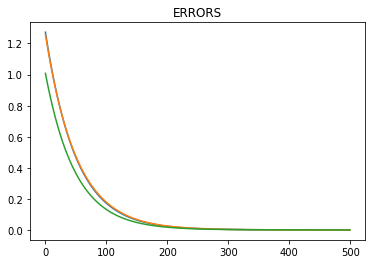

New Theta: 
 [[ 0.49179628  0.00591752  0.4907206 ]
 [ 0.50638355  0.70522534 -0.50130409]
 [ 0.49407609  0.00270529  0.50042117]
 [ 0.5028336  -0.69758395 -0.50132172]]

Final Errors: 
 [0.00131642 0.00134383 0.00129627]


In [6]:
def batch_descent(X, Y, iterations, learning_rate):
    m = X.shape[0]
    n = X.shape[1]
    k = Y.shape[1]
    L = np.zeros((iterations, k))
    
    #YOUR CODE HERE.  
    theta = initialise_parameters(n, k)
    
    for i in range(iterations):
        L[i] = ms_error(X, theta, Y)
        
        gradient = grad(X, theta, Y)
        theta -= learning_rate * gradient
    
    return theta, L #theta, L

#REPORTING CODE. DON'T. JUST DON'T.
new_theta, L = batch_descent(X, Y, 500, 0.01)
for ix in range(0, k):
    plt.plot(L[:, ix])
plt.title('ERRORS')
plt.show()
print('New Theta: \n', new_theta)
print('\nFinal Errors: \n', ms_error(X, new_theta, Y))

---

**TASK 1.7:** Explain what is happening in the above plot, and why $\theta$ congerges to the values it does. Speculate as to why lower or higher (figure out which or whether at all) hz functions modelled have higher initial error than higher hz functions (look at how the data is generated in the $1{st}$ code cell).

---

$\langle$ *Write Your Answer Here* $\rangle$

With the increase of iteration of gradient descent and theta updating, the error of the three linear regressions decrease gradually and successfully converge at the 200th iteration.

$ \theta $ congerges to the values approximately equal to the normalized basis we define because Y is the a linear mapping from X with basis as scalers and small noise.

From the initial errors, we can figure out that the one_hz functions have higher initial error than the zero_hz and two_hz. The reason is that the vector one_hz has the smallest length among these three hz function, which is influenced more by the noise when it was been mapping to Y.

PROGRAMMING EXERCISE 2
-----------

Now, in case you found the above too easy, we're going to introduce something truly evil; content not covered in the lectures. 

Fortunately, this is $\frac{1}{2}$ bonus mark territory. That's right, for a limited time* only, you can compensate for any shortcomings in the theory section by writing more code! And you love writing code! 

We know you love writing code!

So much!

In the below cell, I have transformed $Y$ using a function that cannot be modelled by simple linear regression.

To solve this, we're going to implement a basic neural network. You'll need to implement backpropagation. 

    *Limited time just means the deadline. Obviously, submitting after the deadline won't help you. You'll get bonus marks on 0/100.

---

   **TASK 2.1:** Run the below cell. Explain what as happening in the below plot, and why linear regression cannot model this function $f(X) = Z$ effectively. Explain why it can get partway to "understanding" the problem, but not all the way. 

---

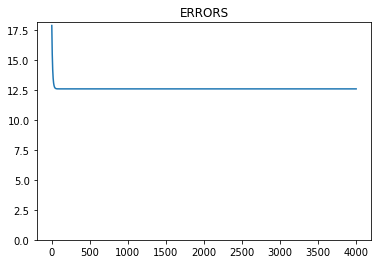

Theta: 
 [[ 0.66539112]
 [-2.66037575]
 [ 0.58107273]
 [ 2.37447637]]

Final Errors: 
 [12.57042807]


In [7]:
Y_Intermittent = 1 / (1 + np.exp(-Y))
Q = Y_Intermittent @ np.array([[3],[-17],[4]])
lr_theta, L = batch_descent(X, Q, 4000, 0.05)
for ix in range(0, Q.shape[1]):
    plt.plot(L[:, ix])
plt.ylim(bottom=0)
plt.title('ERRORS')
plt.show()
print('Theta: \n', lr_theta)
print('\nFinal Errors: \n', ms_error(X, lr_theta, Q))

---

$\langle$ *Write Your Answer Here* $\rangle$

The plot shows that the error decreases with iterationa and becomes stable at the value about 12.5 after the first hundreds iteration.

After the mapping from Y to Y_Intermittent, the problem has become a non-linear regression, even though the final Q is a linear combination of the three columns in Y_Intermittent. The linear regression model we design cannot figure the reflection process in sigmoid function, which is the actual mapping from Y to Y_Intermittent.

The general process of mapping from X to Q can be viewed as linearity, but the sigmoid function add a non-linear property that rescale values into a range of 0 to 1. The linear regression model can figure out most of the linear part, but not the non-linear component, so it will outcome a stable error value.

---

To rectify this situation, we're going to implement a 2 layer neural network. 

In EX1 you implemented the following, optimising theta such that a single training example $x$ can be linearly mapped to $y$, where $x$ is a single training example (a row vector), and $y$ is the output vector of $k$ linear regressions:

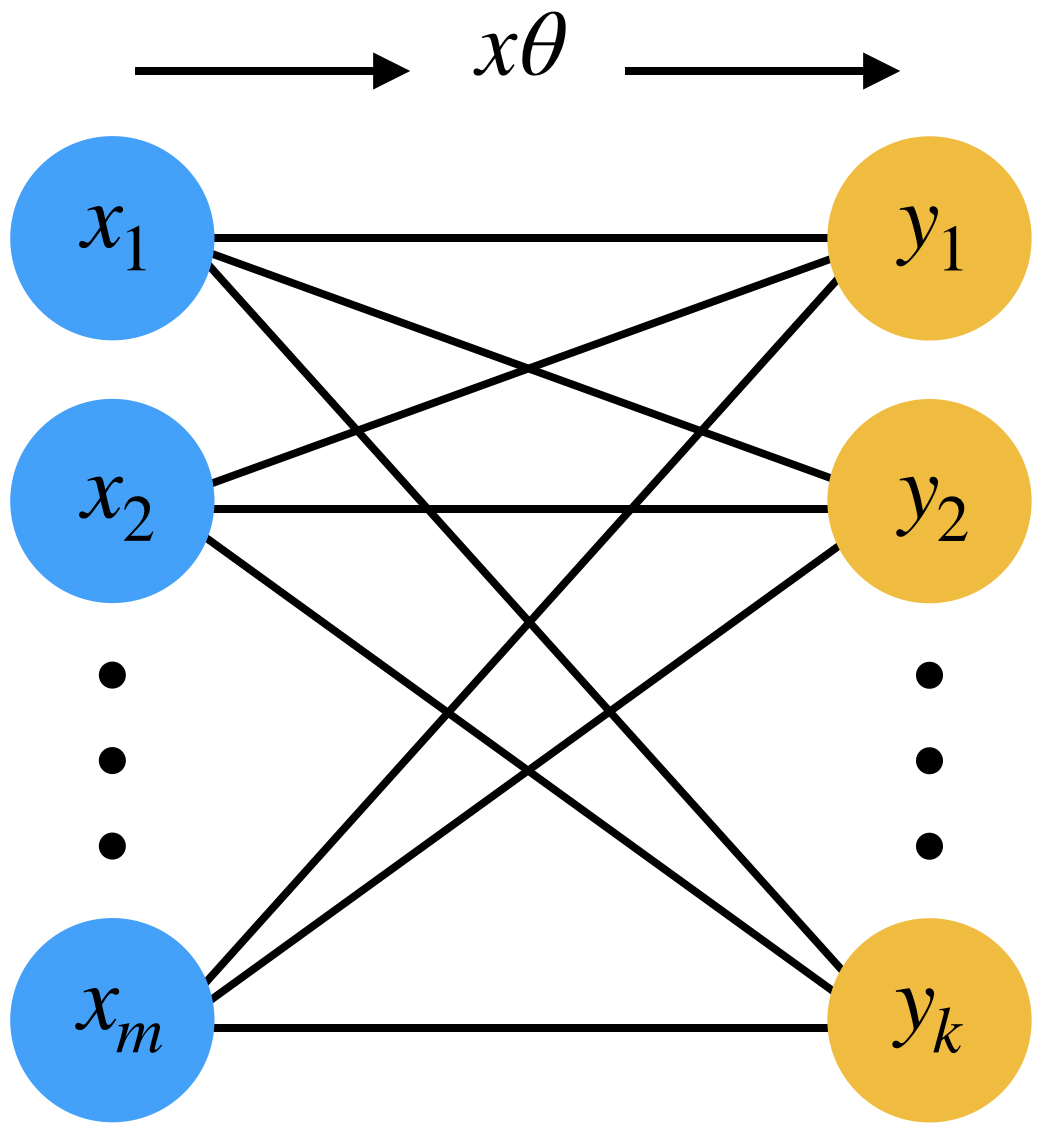

Now we're going to implement a simple neural network $f(x)$ constructed of linear regressions in sequence $\theta^{[1]} \in \mathbb{R}^{n \times k}$ and $\theta^{[2]} \in \mathbb{R}^{k \times 1}$ with a nonlinear function $s(a)$ in the middle.

$\theta^{[1]}$ and $\theta^{[2]}$ are two **different** matrices representing two **different** sets of parameters. They are both linear functions (matrices).

$s(a) = \frac{1}{1 + e^{-a}}$ which is a nonnlinear function called "the logistic function".

$s(a)$ is applied element-wise on a vector. 

So if $x \theta = y$ then $s(x \theta) = \begin{bmatrix} s(y_1) & s(y_2) & ... & s(y_k) \end{bmatrix}$

The whole neural network $f(x) = (s(x\theta^{[1]})) \theta^{[2]}$.

The first layer of the neural network is $x\theta^{[1]} = y$ and the second layer is $s(y) \theta^{[2]} = z$.

$z$ is a scalar, a prediction for a single training example.

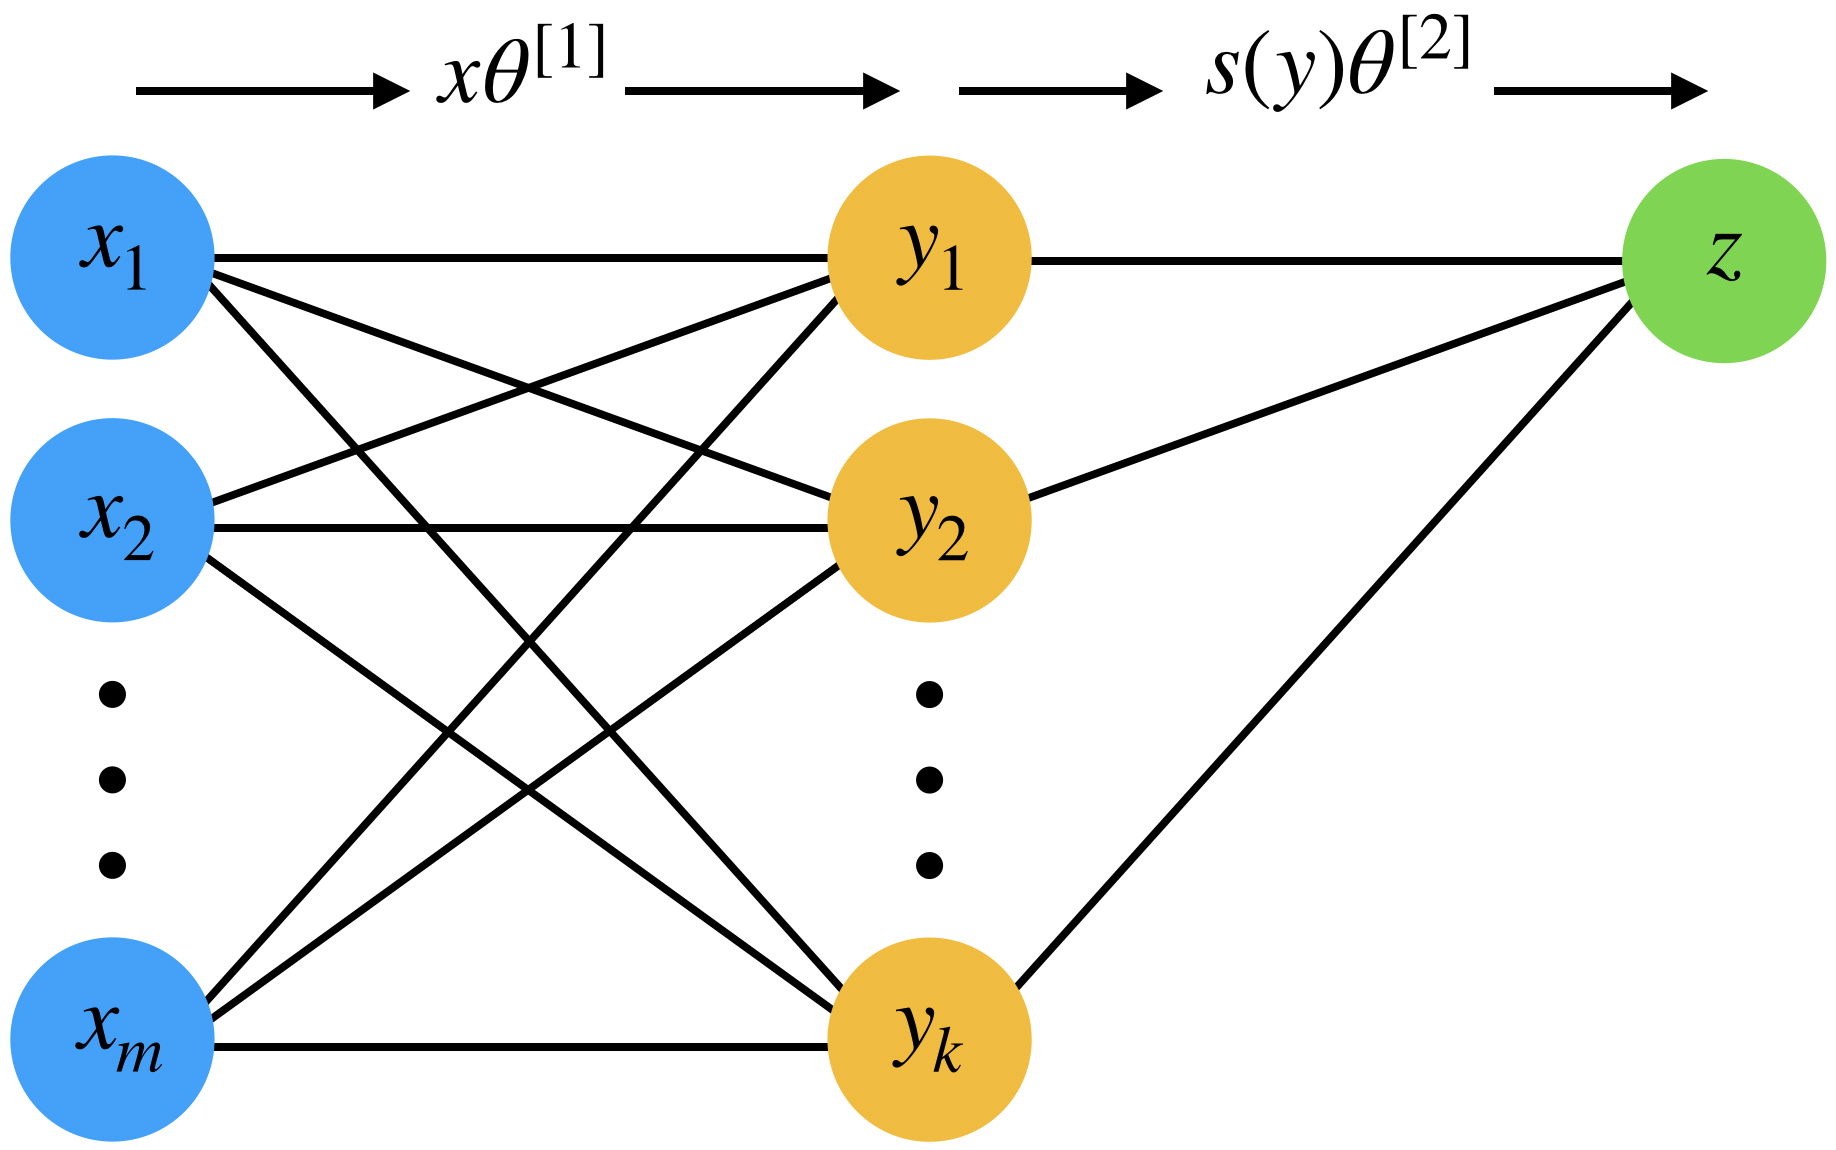

$Q$ computed above is our target variable. This is what we're trying to estimate. $q_i$ is the $ith$ element of $Q$.

$Z \in \mathbb{R}^{m \times 1}$ is the prediction for all training examples, where $m$ is the number of training examples. $z_i$ is the $ith$ element of $Z$.

$X \in \mathbb{R}^{m \times n}$ is our training set. $x_i$ is the $ith$ row of $X$.


Our **objective** is to find $\theta^{[1]}$ and $\theta^{[2]}$ such that $s(X\theta^{[1]}) \theta^{[2]} = Z$ is close to $Q$. In other words, we want to minimise our loss function $\mathcal{L}(f)$.

Our **predictor function** is $f(x) = s(X\theta^{[1]}) \theta^{[2]} = Z$

Our **loss function** is still the mean squared error. It's computed as follows: 
$$\mathcal{L} = \sum_{i = 0}^{m}\frac{1}{2m}|| z_i - q_i ||^2 \\
= \sum_{i = 0}^{m}\frac{1}{2m}(z_i - q_i)^T(z_i - q_i) \\
= \sum_{i = 0}^{m}\frac{1}{2m}(s(x_i\theta^{[1]}) \theta^{[2]} - q_i)^T(s(x_i\theta^{[1]}) \theta^{[2]} - q_i)$$

We want to minimize the loss function by taking the gradients with respect to $\theta^{[1]}$ and $\theta^{[2]}$.

Every iteration of gradient descent, we want to update **both** $\theta^{[1]}$ and $\theta^{[2]}$ by performing the following updates **in sequence**:

$$\theta^{[2]}_{next} = \theta^{[2]} - \gamma \frac{d}{d \theta^{[2]}} \mathcal{L}$$

$$\theta^{[1]}_{next} = \theta^{[1]} - \gamma \frac{d}{d \theta^{[1]}} \mathcal{L}$$

...where $\gamma$ is the learning rate and $\nabla L(\theta^{[j]})$ is the gradient of the loss function with respect to $\theta^{[j]}$.

---

We find these gradients using the chain rule of calculus.

Matrices are functions. $f(x)$ is a composition of functions: 

$$f(x) = \theta^{[2]}(s(\theta^{[1]}(x)))$$

...so the loss functions is also a composition of functions: 

$$\mathcal{L}(f(x)) = \mathcal{L}(\theta^{[2]}(s(\theta^{[1]}(x))))$$

Therefore the gradient of the loss function with respect to $\theta^{[1]}$ and $\theta^{[2]}$ are as follows:


We know from the lectures $$\nabla \mathcal{L} = \frac{1}{m}(\theta^T X^T X - Y^T X)$$ (the 2 is removed because we're using $\frac{1}{2}$ in front of our loss function here).

The above $\theta$ is actually our $\theta^{[2]}$ and $X$ is actually $s(X\theta^{[1]})$

Therefore, subbing in the extra functions and $Q$ in place of $Y$:

$$\frac{d \mathcal{L}}{d \theta^{[2]}} = \frac{1}{m}(s(X\theta^{[1]})^T s(X\theta^{[1]}) \theta^{[2]} - s(X\theta^{[1]})^T Q)$$




$$
\frac{d \mathcal{L}}{d s} = \frac{1}{m} (s(X\theta^{[1]}) \theta^{[2]}\theta^{[2]T}  - Q \theta^{[2]T} )
$$

$$
\frac{d s}{d X\theta^{[1]}} = s(X\theta^{[1]})^T (\textbf{1} - s(X\theta^{[1]})) \odot \textbf{I}
$$

... where $\textbf{1} \in \mathbb{R}^{m \times k}$ is a matrix where every element is the scalar $1$, $\odot$ is the Hadamard product, and $\textbf{I} \in \mathbb{R}^{k \times k}$ is the identity.

- https://en.wikipedia.org/wiki/Hadamard_product_(matrices)

You *should* implement backpropagation, but if you want to solve what follows using the matrix gradients we'll leave it up to you to complete the last steps to compute these gradients. 90% of the answer is above. Consider it light vector calculus practice. If you choose that path, your job here is to understand the above math, infer the remaining small portion necessary for the gradients, and implement the neural network.

---


So to recap, you need to first update $\theta^{[2]}$ with:

$$\theta^{[2]}_{next} = \theta^{[2]} - \gamma \frac{d \mathcal{L}}{d \theta^{[2]}}$$

... and *then* update $\theta^{[1]}$ with:

$$\theta^{[1]}_{next} = \theta^{[1]} - \gamma \frac{d \mathcal{L}}{d \theta^{[1]}}$$

---

**TASK 2.2:** Implement $s(A)$, the sigmoid function applied element-wise to a matrix $A$, and a predictor function $pred(X, \theta^{[1]}, \theta^{[1]}, s) = s(X\theta^{[1]}) \theta^{[2]} = Z$, where...

- $\theta^{[2]}$ is a second 'layer'. It is an entirely seperate set of parameters from $\theta$. 

- $s$ is the sigmoid function, applied elementwise to a matrix.

---

In [8]:
theta_1 = initialise_parameters(n, k)
theta_2 = initialise_parameters(k, 1)

def s(A):
    #YOUR CODE HERE.
    sig = 1/(1 + np.exp(-A))

    return sig

def pred(X, theta_1, theta_2, s):
    #YOUR CODE HERE.
    y_pred = s(X@theta_1)@theta_2

    return y_pred

A = initialise_parameters(n, k) * 999
print('SIGMOID TEST: \n', s(A))

pred_test = pred(X, theta_1, theta_2, s)
print(pred_test)

SIGMOID TEST: 
 [[2.70070112e-297 0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.00000000e+000 0.00000000e+000]]
[[-0.42495972]
 [-0.58915845]
 [-0.30579457]
 ...
 [-0.66447116]
 [-0.35207136]
 [-0.28870098]]


---

**TASK 2.3:** Implement $gradient\_update(X, \theta^{[1]}, \theta^{[2]}, Q, s, \gamma) = \theta^{[1]}_{next}, \theta^{[2]}_{next}$, which takes all the parameters and updates $\theta^{[2]}$ and $\theta^{[1]}$ in sequence.

Do not repeat gradient computations unnecessarily.

You may solve this in a number of ways; 
- You may implement backpropagation. This is the recommended method. It works fastest, is the easiest to implement and is a vital skill to learn if you want to study neural networks further.
- Or you may use the gradient of the matrices involved.
- Or you may compute the gradient elementwise using loops and sums.

Any of the above methods are acceptable.

---

**HINT:** 
- https://medium.com/@pdquant/all-the-backpropagation-derivatives-d5275f727f60
- https://en.wikipedia.org/wiki/Backpropagation

In [9]:
def gradient_update(X, theta_1, theta_2, Q, s, learning_rate):
    #YOUR CODE HERE.
    
    m = X.shape[0]
    n = X.shape[1]
    k = theta_1.shape[1]

    # Calculate the gradient of theta 2.
    S = s(X@theta_1)
    grad_theta_2 = grad(S, theta_2, Q)
    
    # Calculate the gradient of theta 1.
    grad_s = grad(theta_2.T, S.T, Q.T)
    grad_y1 = np.multiply(S, np.ones((m, k)) - S).T        # Sigmoid function is a element-multiplication.
    grad_theta_1 = (np.multiply(grad_s, grad_y1)@X).T
              
    theta_2_next = theta_2 - learning_rate * grad_theta_2
    theta_1_next = theta_1 - learning_rate * grad_theta_1

    return theta_1_next, theta_2_next #theta_1_next, theta_2_next


test_1, test_2 = gradient_update(X, theta_1, theta_2, Q, s, 0.5)


---

**TASK 2.4:** Implement the mean squared cost function for your neural network.

---

In [10]:
def nn_ms_error(X, theta_1, theta_2, Q, s):   
    mse = np.zeros((m, 1))
  
    y = pred(X, theta_1, theta_2, s)    
    l = y - Q
    mse = np.sum(np.multiply(l, l), axis=0).T / 2 / m   # Element multiplication.
    
    return mse

print(nn_ms_error(X, theta_1, theta_2, Q, s))

[16.92299172]


---

**TASK 2.5:** Implement batch gradient descent for your neural network. 

$nn\_batch\_descent(X, \theta_1, \theta_2, Q, s, iterations, \gamma) = \theta_1, \theta_2, nn\_L$, where nn\_L is the error recorded for the neural network at each iteration. 

As always, use the functions you completed above.

---

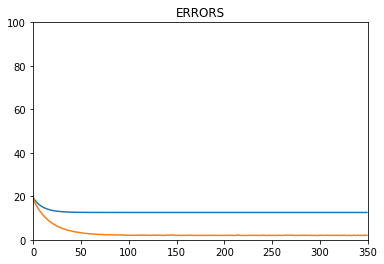

LR Theta: 
 [[ 0.66539102]
 [-2.66037565]
 [ 0.58107271]
 [ 2.37447632]]
Theta 1: 
 [[ 14.4443848   20.92665653 -19.80082863]
 [-58.84995326 -81.65564641  54.22445075]
 [ 13.83365901  18.44082345  -8.38273712]
 [ 51.33165919  72.1617588  -54.31067645]]
Theta 2: 
 [[-0.9312243 ]
 [-0.85989647]
 [-8.0657945 ]]

Final NN Error: 
 [2.05282468]

Final LR Error: 
 [12.57042807]
NN error is  0.1633058693045711  of LR error.


In [11]:
theta_1 = initialise_parameters(n, k)
theta_2 = initialise_parameters(k, 1)

def nn_batch_descent(X, theta_1, theta_2, Q, s, iterations, learning_rate):
    m = X.shape[0]
    n = X.shape[1]
    k = theta_1.shape[1]
    L = np.zeros((iterations, 1))
    #YOUR CODE HERE.
    
    for i in range(iterations):
        L[i] = nn_ms_error(X, theta_1, theta_2, Q, s) 
        theta_1, theta_2 = gradient_update(X, theta_1, theta_2, Q, s, learning_rate)
        
    return theta_1, theta_2, L #theta_1, theta_2, L

#SETTINGS
learning_rate = 0.05
iterations = 350

# REPORTING. LEAVE ALONE.
theta_1, theta_2, nn_L = nn_batch_descent(X, theta_1, theta_2, Q, s, iterations, learning_rate)
lr_theta, L = batch_descent(X, Q, iterations, learning_rate)
plt.plot(L[:])
plt.plot(nn_L[:])
plt.title('ERRORS')
plt.ylim(0, 100)
plt.xlim(0, iterations)
plt.show()
print('LR Theta: \n', lr_theta)
print('Theta 1: \n', theta_1)
print('Theta 2: \n', theta_2)
print('\nFinal NN Error: \n', nn_L[iterations - 1])
def identity_f(x):
    return x
I = (np.eye(1, 1))
print('\nFinal LR Error: \n', L[iterations - 1])
print('NN error is ', float(nn_L[iterations - 1] / L[iterations - 1]), ' of LR error.')

---